In [122]:
def img_to_rgb(img):
    image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for i in labels_to_rgb.keys():
        image[img == i] = labels_to_rgb[i]
    return image

In [123]:
labels_to_rgb = {
    0: (255, 255, 255),
    1: (0, 0, 0),
    2: (100, 100, 100),
    3: (0, 125, 0),
    4: (0, 255, 0),
    5: (150, 80, 0),
    6: (0, 0, 150),
    7: (255, 255, 0),
    8: (150, 150, 255)}

In [124]:
rgb_to_labels = {
    (255, 255, 255): 0,
    (0, 0, 0): 1,
    (100, 100, 100): 2,
    (0, 125, 0): 3,
    (0, 255, 0): 4,
    (150, 80, 0): 5,
    (0, 0, 150): 6,
    (255, 255, 0): 7,
    (150, 150, 255): 8}

In [118]:
import os

path_im = []
for path, dirs, files in os.walk('/home/aschern/project/datasets/Zurich_dataset_v1.0/images_tif'):
    for f in files:
        if f[-3:] == 'tif':
            path_im.append(os.path.join(path, f))

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


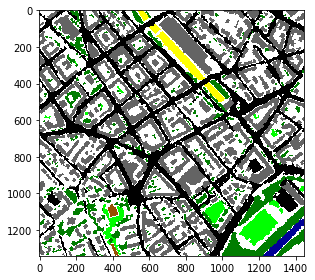

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


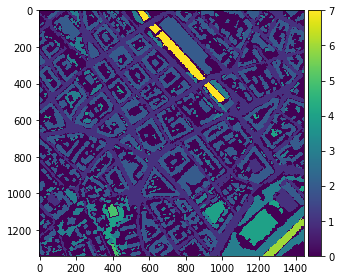

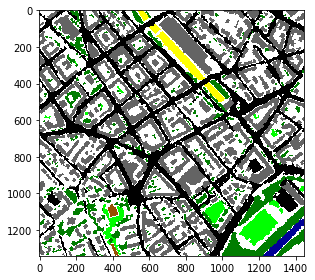

In [158]:
import numpy as np
from skimage.color.colorconv import rgb2grey

def convert_key(x):
    if x == (100, 100, 100):
        return 0.392156862745098
    return (0.2125 * x[0] + 0.7154 * x[1] + 0.0721 * x[2]) / 255

def rgb_to_lab(img):
    image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for col in rgb_to_labels:
        c = convert_key(col)
        image[img == c] = rgb_to_labels[col]
    return image


file = path_im[0]
labels = file.replace('.tif', '_GT.tif').replace('my_images', 'groundtruth')
l = imread(labels)
imshow(l)
plt.show()
image = rgb2grey(l)
plt.show()
lab = rgb_to_lab(image)
imshow(lab)
plt.show()
imshow(img_to_rgb(lab))

In [160]:
import numpy as np
#from skimage.io import imread, imshow
from skimage import img_as_ubyte
from tifffile import imread, imshow, imsave
from scipy.misc import imresize
from matplotlib import pyplot as plt

%matplotlib inline

import numpy as np
from skimage.io import imread, imshow
from skimage import img_as_ubyte
import tifffile as tiff
from scipy.misc import imresize
from matplotlib import pyplot as plt

%matplotlib inline

for file in path_im:
    img = imread(file)
    img = img[:,:,:3]
    new_file = file.replace('images_tif', 'my_images')
    imsave(new_file, img_as_ubyte(img / np.max(img)))
    lab = file.replace('.tif', '_GT.tif').replace('my_images', 'groundtruth')
    l = imread(lab)
    image = rgb2grey(l)
    new_lab = lab.replace('groundtruth', 'my_groundtruth')
    imsave(new_lab, rgb_to_lab(image))

/home/aschern/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [161]:
path_im = []
for path, dirs, files in os.walk('/home/aschern/project/datasets/Zurich_dataset_v1.0/my_images'):
    for f in files:
        if f[-3:] == 'tif':
            path_im.append(os.path.join(path, f))

In [164]:
offset = 384
for file in path_im:
    img = imread(file)
    lab = file.replace('.tif', '_GT.tif').replace('my_images', 'my_groundtruth')
    l = imread(lab)
    for i in range(l.shape[0] // offset):
        for j in range(l.shape[1] // offset):
            crop_lab = l[i*offset:(i+1)*offset, j*offset:(j+1)*offset]
            new_img_name = lab.replace('my_groundtruth', 'crop_groundtruth')[:-4] + str(i) + str(j)+'.tif'
            imsave(new_img_name, crop_lab)
            crop_img = img[i*offset:(i+1)*offset, j*offset:(j+1)*offset]
            new_img_name = file.replace('my_images', 'crop_images')[:-4] + str(i) + str(j)+'.tif'
            imsave(new_img_name, crop_img)

In [ ]:
'''
%% Convert RGB ground truths to CLASS \in {1,...,C} raster format
LEGEND = [
    255    255    255;  % Background
      0      0      0;  % Roads
    100    100    100;  % Buildings
      0    125      0;  % Trees
      0    255      0;  % Grass
    150     80      0;  % Bare Soil
      0      0    150;  % Water
    255    255      0;  % Railways
    150    150    255]; % Swimming Pools 
'''